In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [19]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

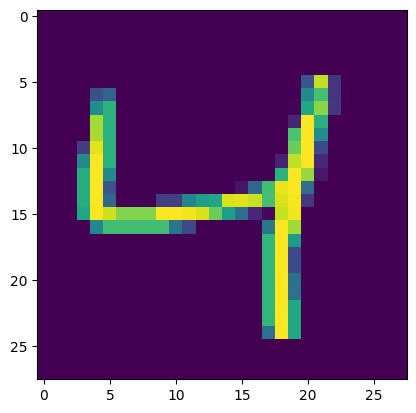

In [17]:
plt.imshow(x_train[2,:,:])

In [60]:
x_train_rs = x_train.reshape(60000, 784)
x_test_rs = x_test.reshape(10000, 784)

In [61]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [62]:
model=Sequential()
model.add(Dense(1024,activation='relu',input_dim=784))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [64]:
model_dir = './model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + '/{epoch:02d}-{val_loss:.4f}.keras'

In [65]:
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss',save_best_only=True, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [66]:
hist = model.fit(x_train_rs, y_train_ohe, validation_data=(x_test_rs, y_test_ohe), epochs=100, batch_size=100, callbacks=[early_stopping_callback, checkpointer] )

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8221 - loss: 4.8628
Epoch 1: val_loss improved from inf to 0.15778, saving model to ./model/01-0.1578.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.8222 - loss: 4.8567 - val_accuracy: 0.9559 - val_loss: 0.1578
Epoch 2/100
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9623 - loss: 0.1271
Epoch 2: val_loss improved from 0.15778 to 0.12227, saving model to ./model/02-0.1223.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9623 - loss: 0.1271 - val_accuracy: 0.9656 - val_loss: 0.1223
Epoch 3/100
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9768 - loss: 0.0785
Epoch 3: val_loss improved from 0.12227 to 0.12170, saving model to ./model/03-0.1217.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9768 - loss: 0.0785 - val_accuracy: 0.9671 - val_loss: 0.1217
Epoch 4/100
598/600 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9751 - loss: 0.0849
Epoch 4: val_loss i

In [68]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/16-0.0911.keras')

In [69]:
best_model.evaluate(x_test_rs, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.1050


[0.09109347313642502, 0.9789999723434448]

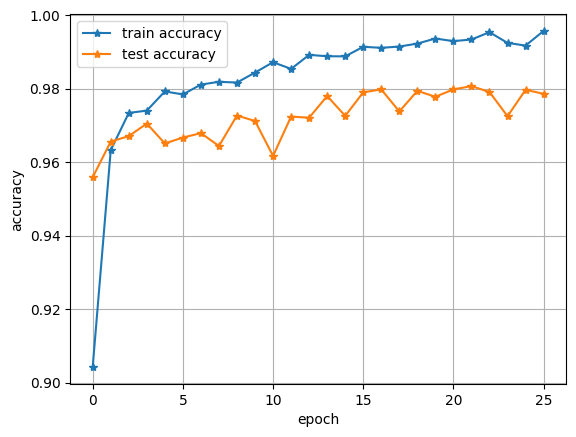

In [70]:
plt.figure()
plt.plot(hist.history['accuracy'],marker='*',label='train accuracy')
plt.plot(hist.history['val_accuracy'],marker='*',label='test accuracy')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [72]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout

In [73]:
#Conv2D
#이미지를 학습하는 layer
#데이터를 4차원으로 입력받음
#(batch_size,with,hight,depth)-(이미지수, 이미지폭, 이미지높이, 칼라)

In [74]:
x_train_f = x_train.reshape(x_train.shape[0], 28,28,1)
x_test_f = x_test.reshape(x_test.shape[0], 28,28,1)

In [75]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))   # multi classification
model.summary()

c:\Users\M\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,810 (2.29 MB)

 Trainable params: 600,810 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
hist = model.fit(x_train_f, y_train_ohe, validation_data=(x_test_f, y_test_ohe), epochs=100, batch_size=100, callbacks=[early_stopping_callback, checkpointer] )

Epoch 1/100
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8170 - loss: 2.4734
Epoch 1: val_loss improved from 0.09109 to 0.07035, saving model to ./model/01-0.0703.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.8173 - loss: 2.4672 - val_accuracy: 0.9789 - val_loss: 0.0703
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9686 - loss: 0.1026
Epoch 2: val_loss improved from 0.07035 to 0.05586, saving model to ./model/02-0.0559.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.9686 - loss: 0.1026 - val_accuracy: 0.9808 - val_loss: 0.0559
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9777 - loss: 0.0726
Epoch 3: val_loss improved from 0.05586 to 0.05001, saving model to ./model/03-0.0500.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9777 - loss: 0.0726 - val_accuracy: 0.9847 - val_loss: 0.0500
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9824 - loss: 0.0574
Epoch 4: val_lo